In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Preparation and Cleaning

Loading Data:

Objective: Load and examine two datasets, sp500_5yrs.csv and sp500_companies.csv.

Action: Read the data into DataFrames and preview the columns and rows to understand their structure.

In [2]:
data_a = pd.read_csv("sp500_5yrs.csv")
data_b = pd.read_csv("sp500_companies.csv")

In [3]:
data_a = data_a[["date", "close", "volume", "Name"]]
data_a.head()

date  close    volume Name
0   2/8/2013  14.75   8407500  AAL
1  2/11/2013  14.46   8882000  AAL
2  2/12/2013  14.27   8126000  AAL
3  2/13/2013  14.66  10259500  AAL
4  2/14/2013  13.99  31879900  AAL

In [4]:
data_b.head()

Exchange Symbol              Shortname               Longname  \
0      NMS   AAPL             Apple Inc.             Apple Inc.   
1      NMS   MSFT  Microsoft Corporation  Microsoft Corporation   
2      NMS   NVDA     NVIDIA Corporation     NVIDIA Corporation   
3      NMS  GOOGL          Alphabet Inc.          Alphabet Inc.   
4      NMS   GOOG          Alphabet Inc.          Alphabet Inc.   

                   Sector                        Industry  Currentprice  \
0              Technology            Consumer Electronics        224.53   
1              Technology       Software - Infrastructure        415.55   
2              Technology                  Semiconductors        123.74   
3  Communication Services  Internet Content & Information        163.80   
4  Communication Services  Internet Content & Information        165.49   

       Marketcap        Ebitda  Revenuegrowth           City State  \
0  3413776531456  1.317810e+11          0.049      Cupertino    CA   
1  3088799498240  1.294330e+11          0.152        Redmond    WA   
2  3043793567744  4.927500e+10          2.621    Santa Clara    CA   
3  2026189619200  1.154780e+11          0.136  Mountain View    CA   
4  2025365962752  1.154780e+11          0.136  Mountain View    CA   

         Country  Fulltimeemployees  \
0  United States           161000.0   
1  United States           228000.0   
2  United States            29600.0   
3  United States           179582.0   
4  United States           179582.0   

                                 Longbusinesssummary    Weight  
0  Apple Inc. designs, manufactures, and markets ...  0.065981  
1  Microsoft Corporation develops and supports so...  0.059700  
2  NVIDIA Corporation provides graphics and compu...  0.058830  
3  Alphabet Inc. offers various products and plat...  0.039162  
4  Alphabet Inc. offers various products and plat...  0.039146

Merging Data:

Objective: Integrate stock price data with company metadata.

Action: Merge data_a (stock prices) with data_b (company metadata) on company names and symbols. Rename columns for clarity and select relevant columns (Date, Close, Volume, Weight, Symbol, Security, Sector, Industry).

In [5]:
# Merging DataFrames on Name and Symbol
merged_df = pd.merge(data_a, data_b, left_on='Name', right_on='Symbol', how='inner')

# Renaming and selecting relevant columns
merged_df = merged_df.rename(columns={
    'date': 'Date',
    'close': 'Close',
    'Shortname': 'Security',
    'volume': 'Volume'
})

selected_columns = ['Date', 'Close', 'Volume','Weight','Symbol', 'Security', 'Sector', 'Industry']
final_df = merged_df[selected_columns]

# Display the final DataFrame
final_df.head()

Date  Close    Volume    Weight Symbol                       Security  \
0   2/8/2013  14.75   8407500  0.000129    AAL  American Airlines Group, Inc.   
1  2/11/2013  14.46   8882000  0.000129    AAL  American Airlines Group, Inc.   
2  2/12/2013  14.27   8126000  0.000129    AAL  American Airlines Group, Inc.   
3  2/13/2013  14.66  10259500  0.000129    AAL  American Airlines Group, Inc.   
4  2/14/2013  13.99  31879900  0.000129    AAL  American Airlines Group, Inc.   

        Sector  Industry  
0  Industrials  Airlines  
1  Industrials  Airlines  
2  Industrials  Airlines  
3  Industrials  Airlines  
4  Industrials  Airlines

Filtering Top Companies:

Objective: Focus on the top companies by weight in each sector.

Action: For each sector, select the top five companies based on their weight. Concatenate this data into a comprehensive DataFrame for further analysis.

In [6]:
# Initialize an empty DataFrame to contain the filtered data
top_data = pd.DataFrame()

# Iterate across a list of the unique sectors
for sector in final_df['Sector'].unique():
    
    # Filter the data by the current sector
    sector_data = final_df[final_df['Sector'] == sector]

    # Compile a list of the top five weights in the current sector
    top_five_weights = sorted(sector_data['Weight'].unique(), reverse=True)[:5]
    
    # Filter the data by the top five weights
    sector_data = sector_data[sector_data['Weight'].isin(top_five_weights)]
    
    # Concatenate the top five companies' data into the accumulating DataFrame
    top_data = pd.concat([top_data, sector_data], ignore_index=True)

# Print the last five rows of the filtered DataFrame
top_data.head()

Date  Close   Volume    Weight Symbol           Security       Sector  \
0   2/8/2013  96.85  3934113  0.003209    CAT  Caterpillar, Inc.  Industrials   
1  2/11/2013  96.60  2739107  0.003209    CAT  Caterpillar, Inc.  Industrials   
2  2/12/2013  97.22  4148908  0.003209    CAT  Caterpillar, Inc.  Industrials   
3  2/13/2013  96.38  3718446  0.003209    CAT  Caterpillar, Inc.  Industrials   
4  2/14/2013  96.07  3586223  0.003209    CAT  Caterpillar, Inc.  Industrials   

                              Industry  
0  Farm & Heavy Construction Machinery  
1  Farm & Heavy Construction Machinery  
2  Farm & Heavy Construction Machinery  
3  Farm & Heavy Construction Machinery  
4  Farm & Heavy Construction Machinery

Visualization of Company Data

Bar Plot of Company Weights:

Objective: Visualize the top five companies by weight in each sector.

Action: Create bar plots for each sector showing the weight of the top companies. This provides a visual comparison of company prominence within their sectors.

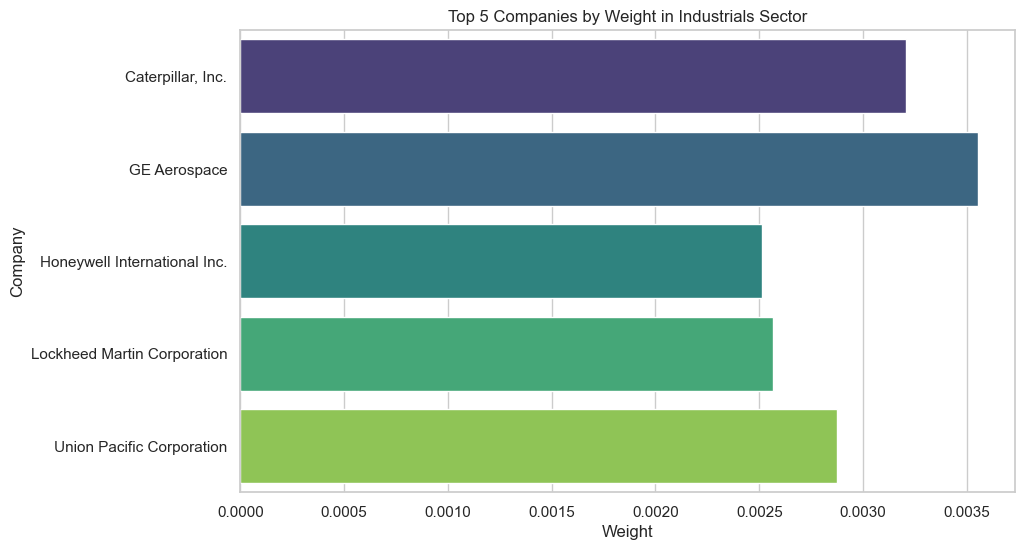

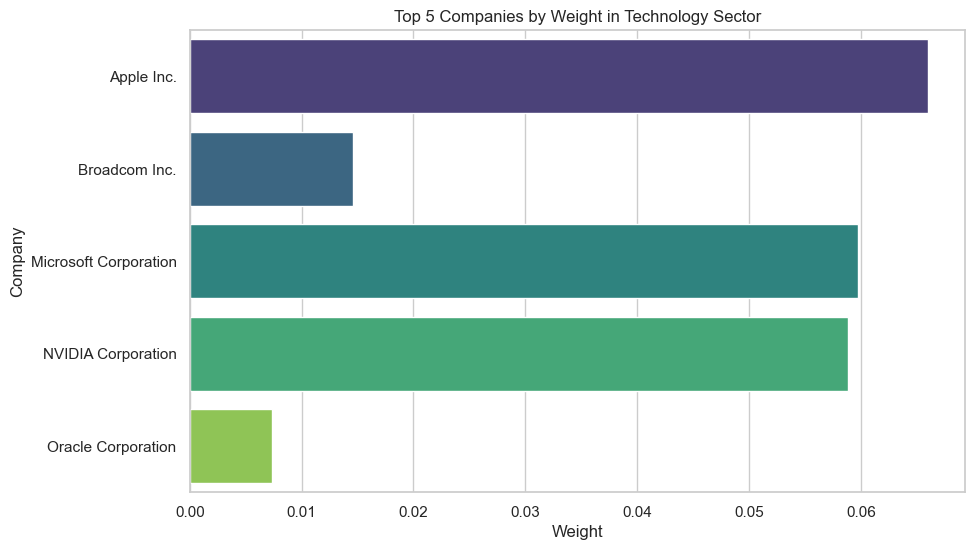

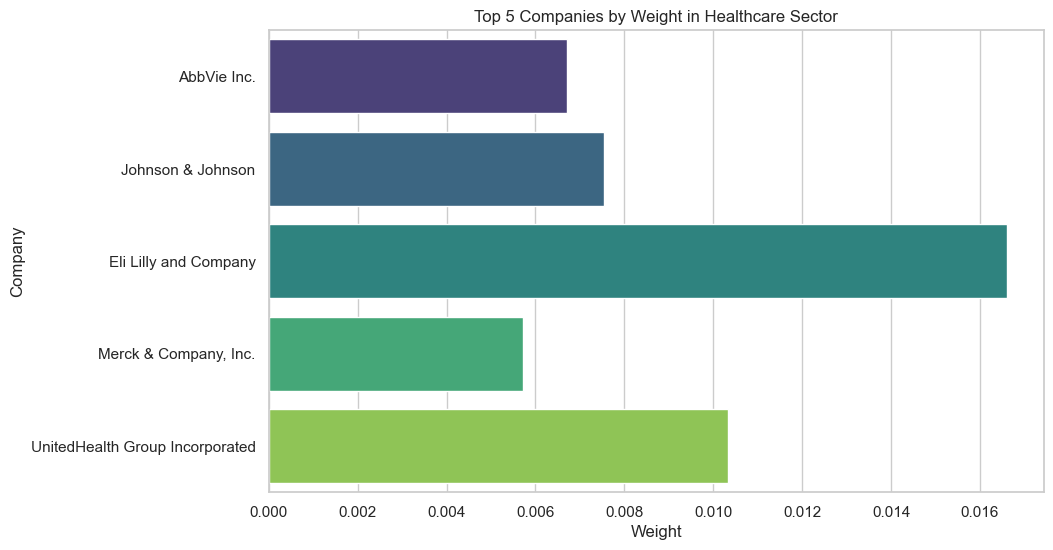

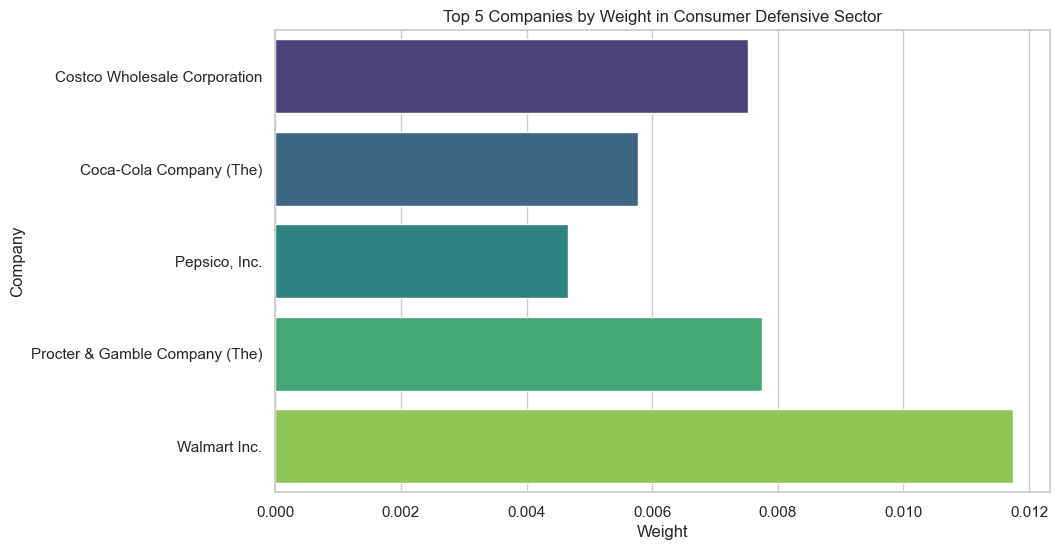

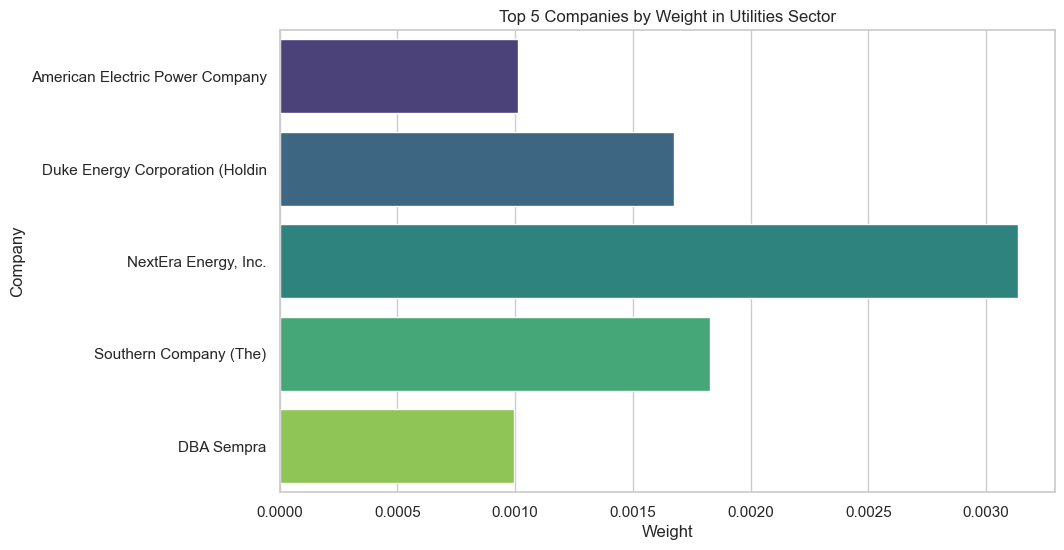

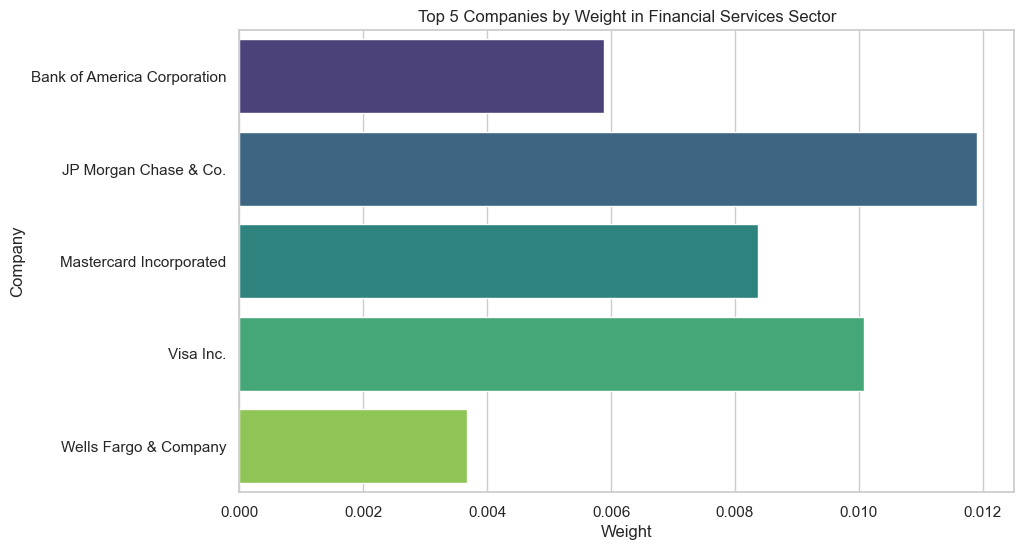

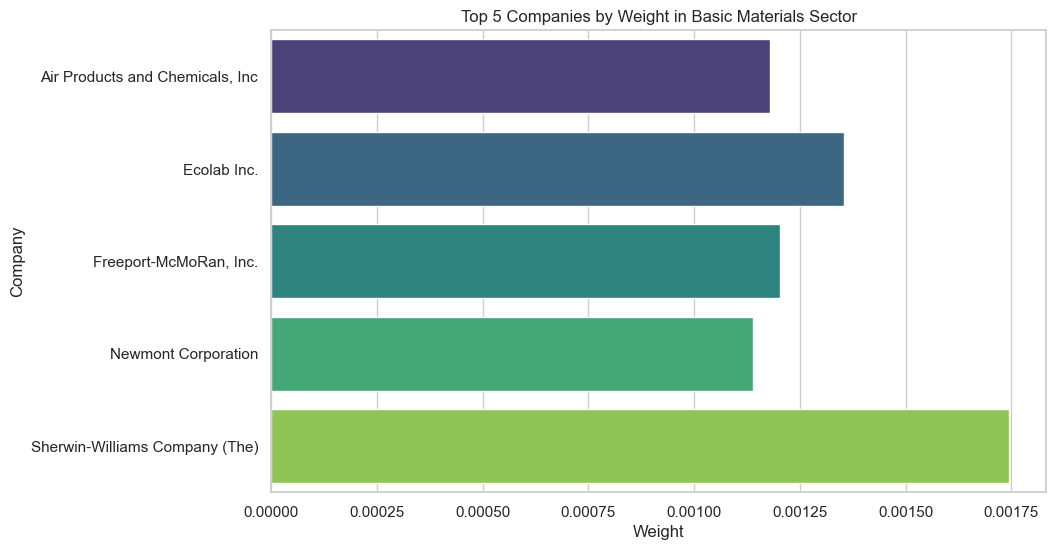

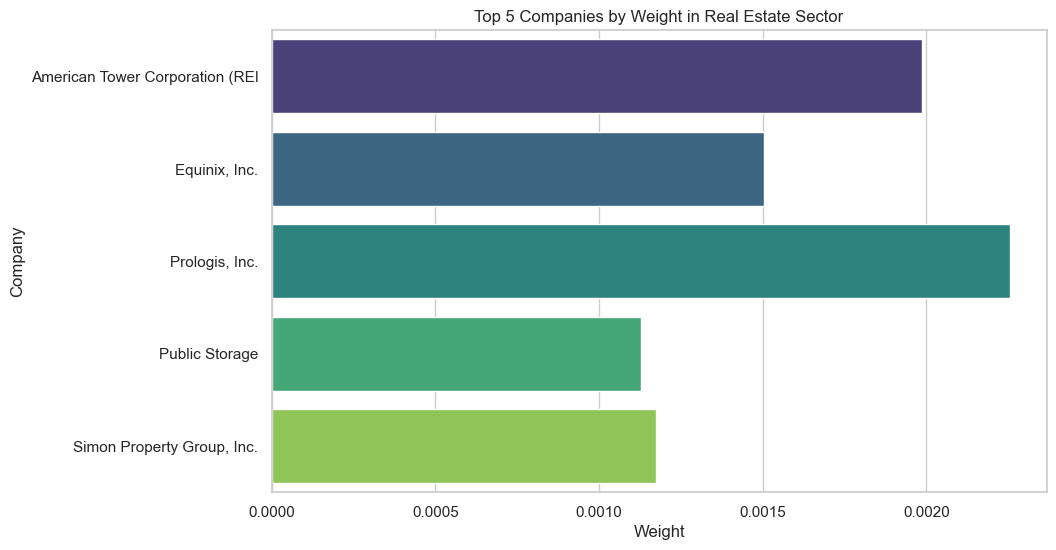

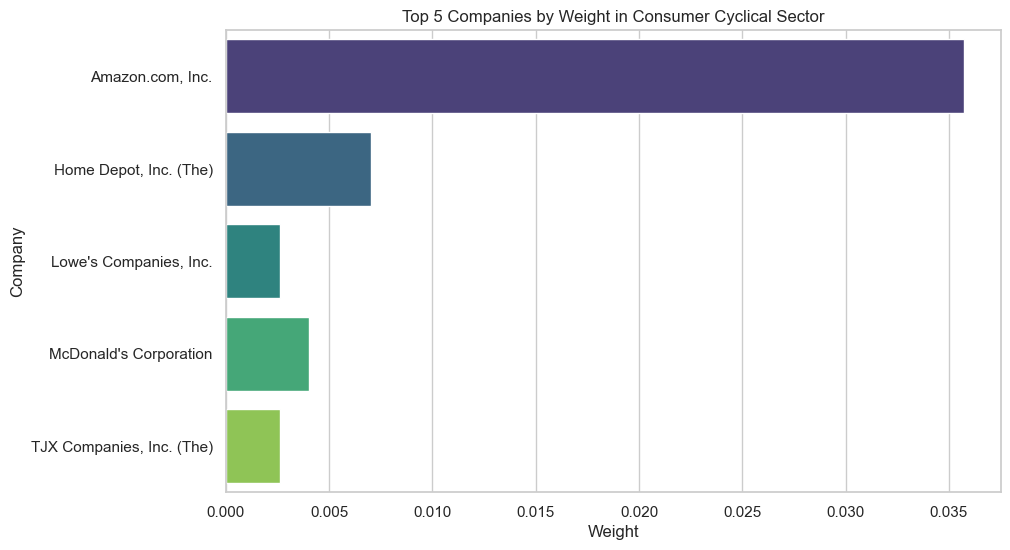

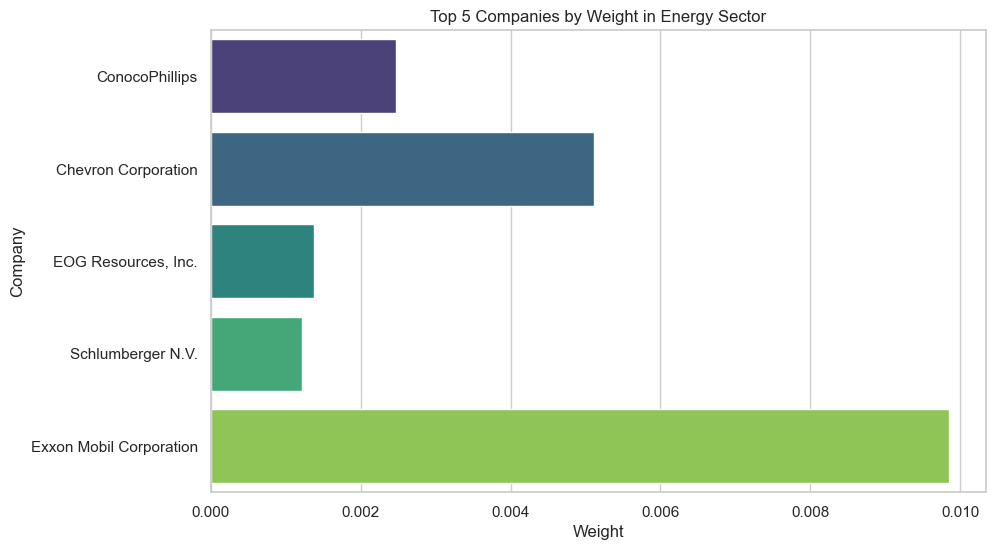

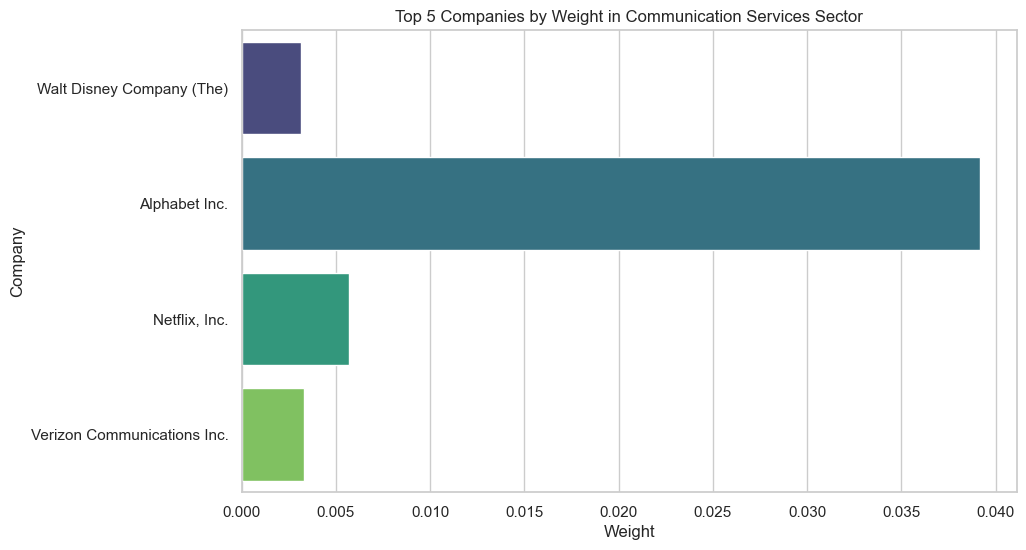

In [7]:
# Plotting the top 5 companies in each sector
sns.set(style="whitegrid")

# Iterate over each sector and plot
for sector in top_data['Sector'].unique():
    plt.figure(figsize=(10, 6))
    sector_data = top_data[top_data['Sector'] == sector]
    
    sns.barplot(x='Weight', y='Security', data=sector_data, palette='viridis')
    plt.title(f'Top 5 Companies by Weight in {sector} Sector')
    plt.xlabel('Weight')
    plt.ylabel('Company')
    plt.show()

Line Plot of Stock Prices:

Objective: Track and compare stock price trends over time for the top companies in each sector.

Action: Plot line graphs for each sector, displaying the historical closing prices of the top companies. This helps in understanding price movements and trends.

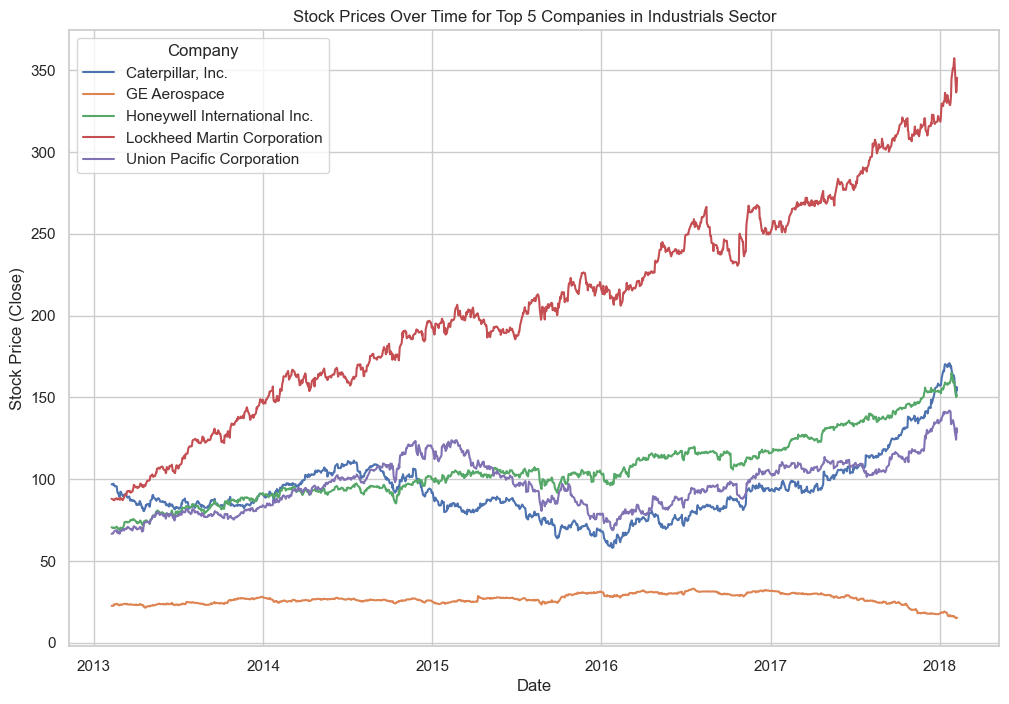

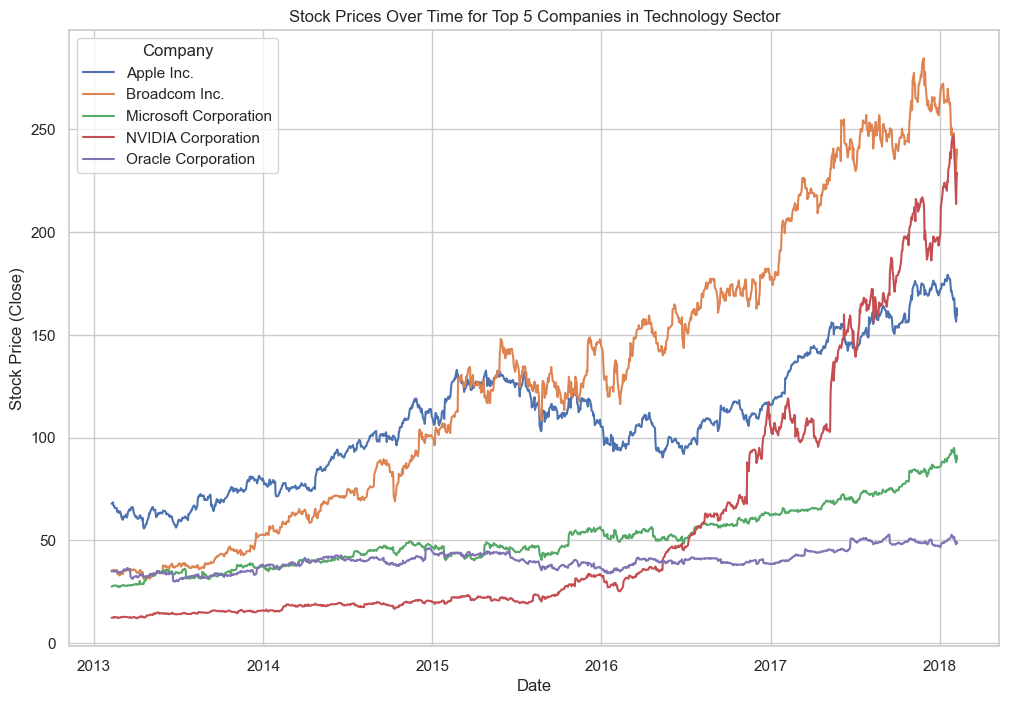

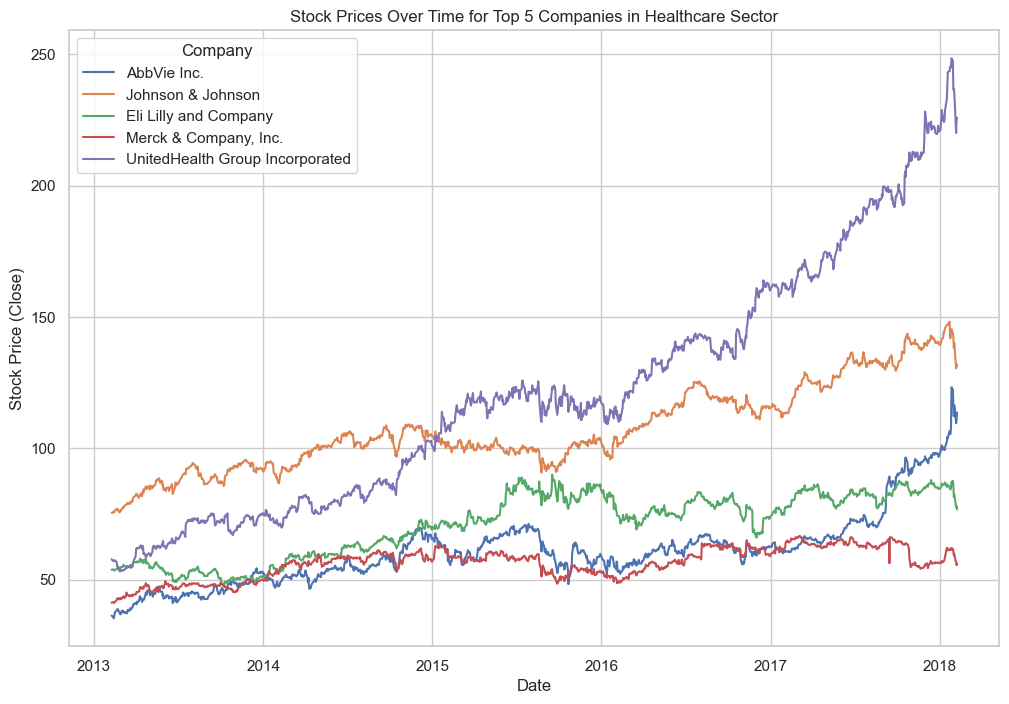

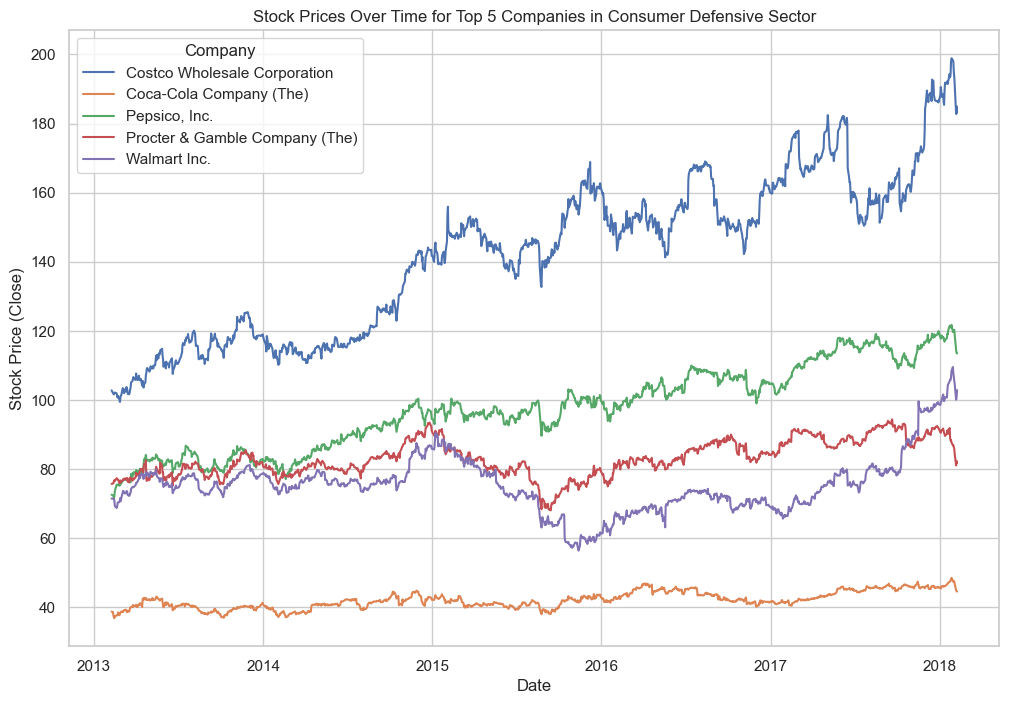

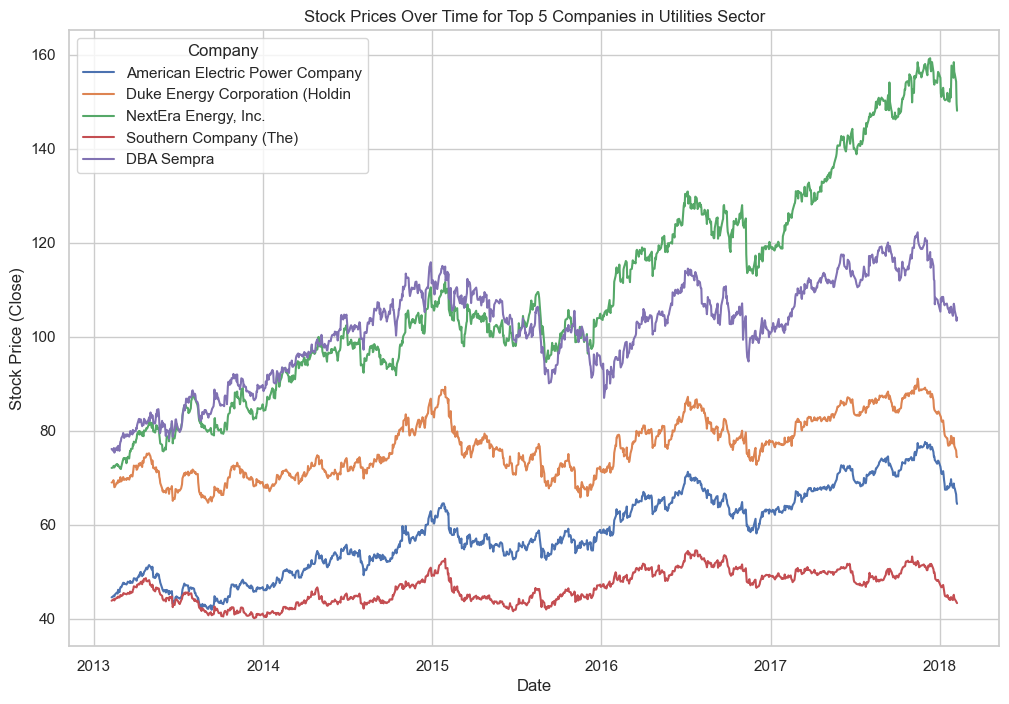

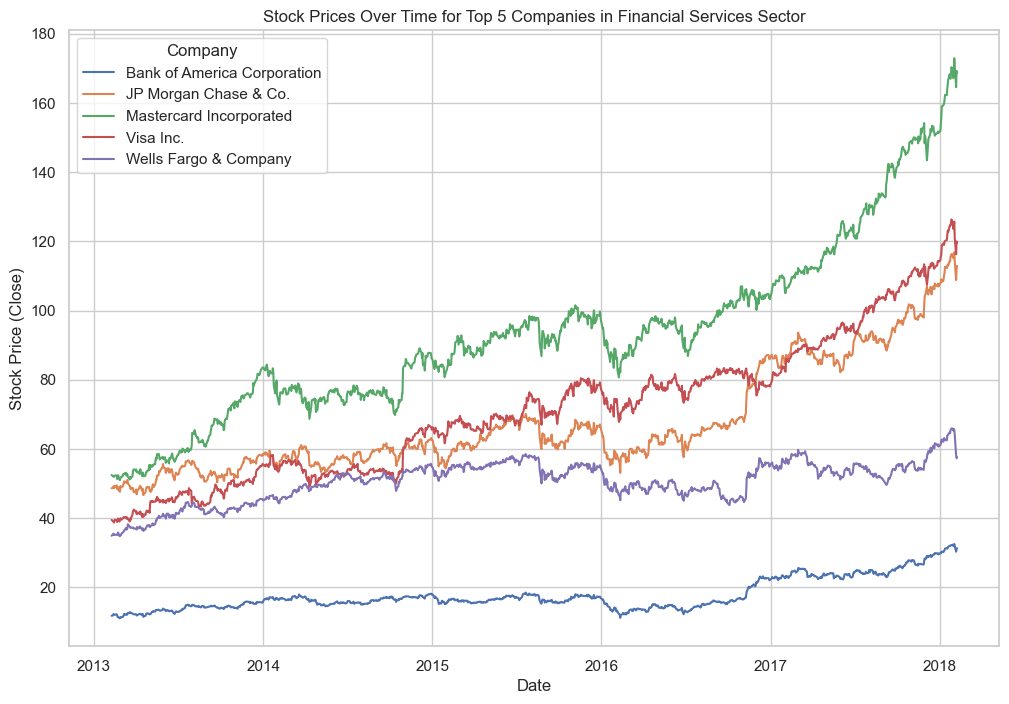

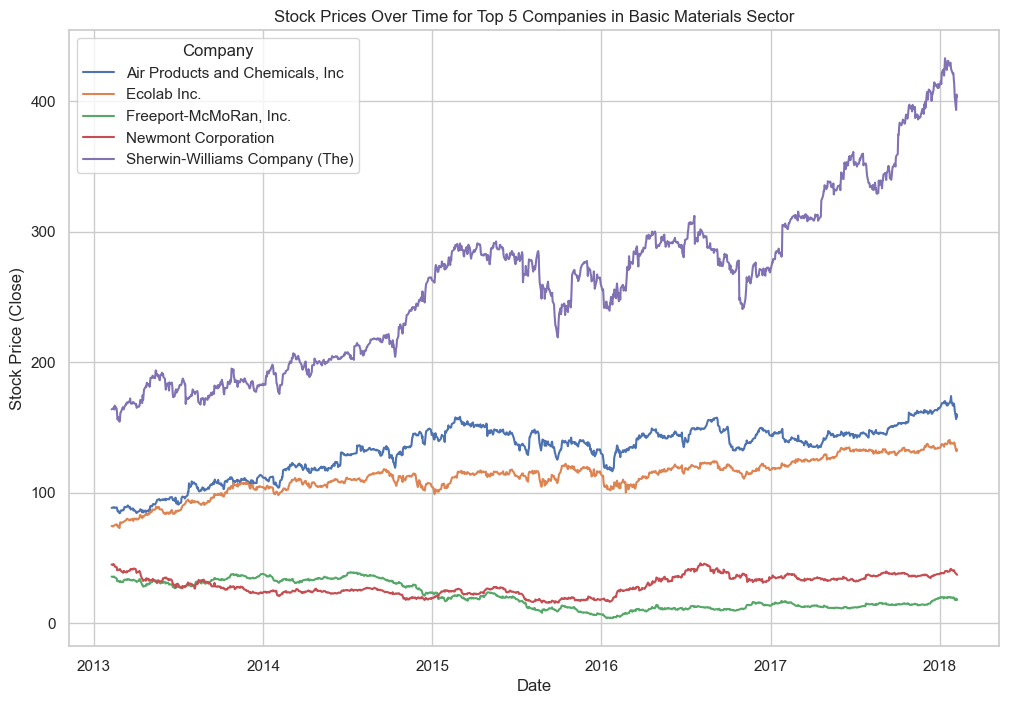

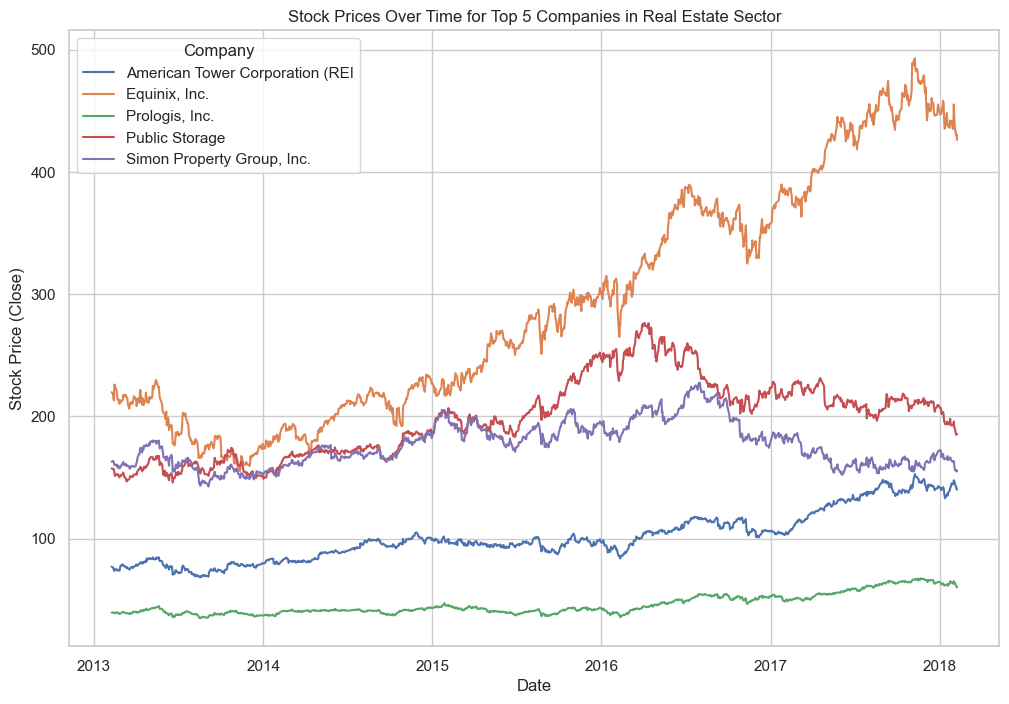

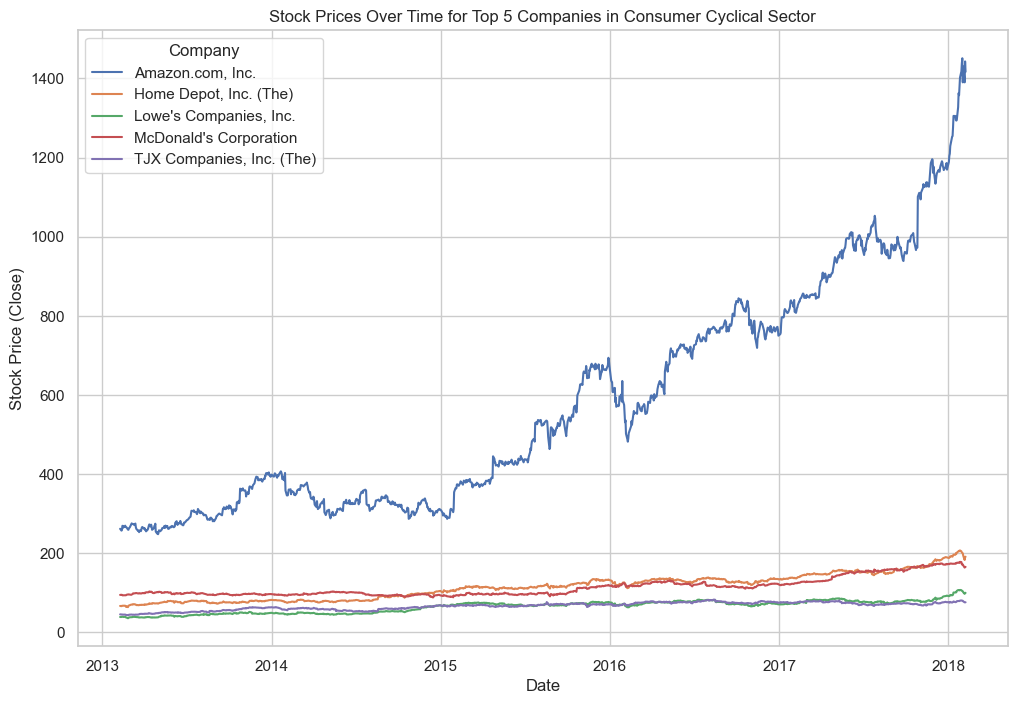

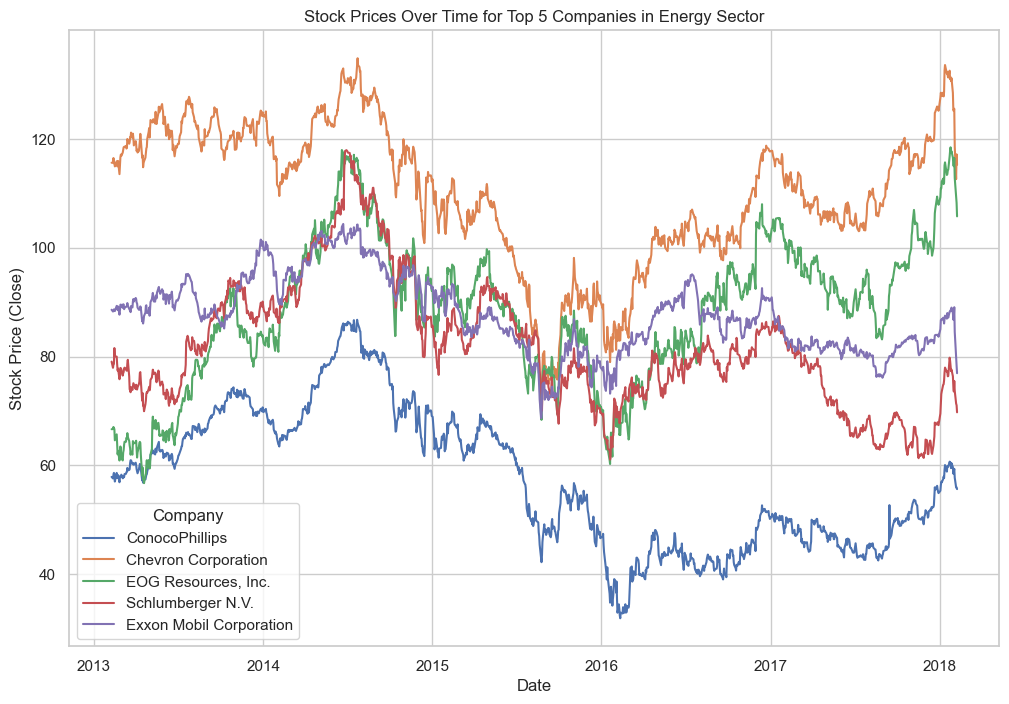

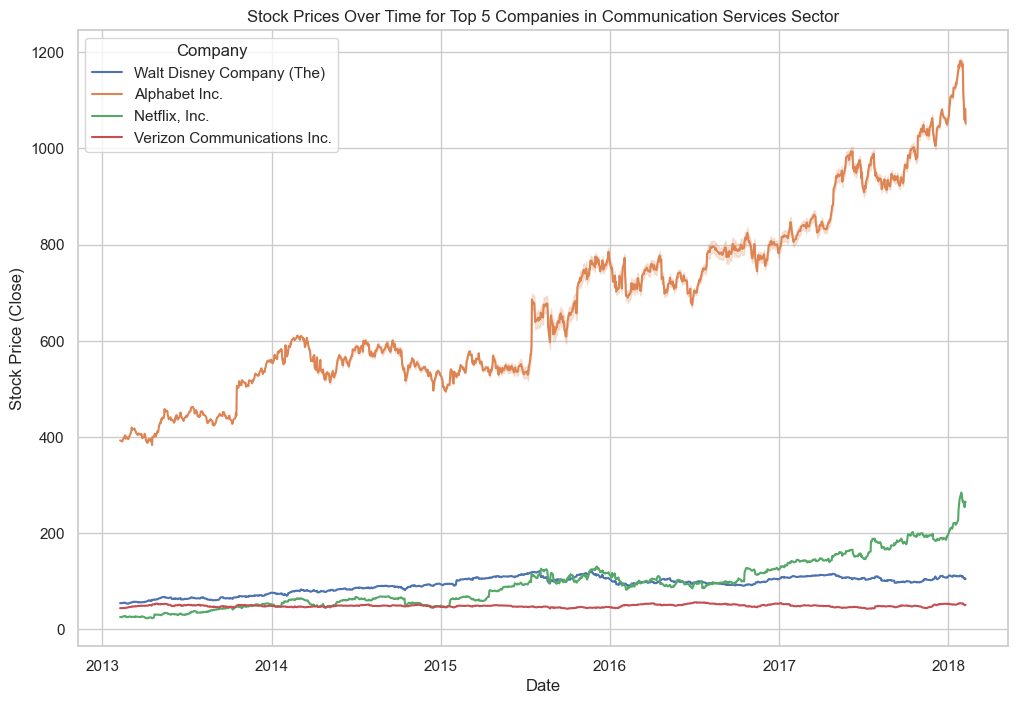

In [8]:
# Convert 'Date' to datetime format for accurate plotting
top_data['Date'] = pd.to_datetime(top_data['Date'])

# Plotting stock prices over time for the top 5 companies in each sector
sns.set(style="whitegrid")

# Iterate over each sector and plot
for sector in top_data['Sector'].unique():
    plt.figure(figsize=(12, 8))
    sector_data = top_data[top_data['Sector'] == sector]
    
    sns.lineplot(x='Date', y='Close', hue='Security', data=sector_data)
    
    plt.title(f'Stock Prices Over Time for Top 5 Companies in {sector} Sector')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (Close)')
    plt.legend(title='Company')
    plt.show()

Line Plot of Trading Volumes:

Objective: Examine trading volume trends over time for the top companies in each sector.

Action: Create line plots for each sector showing trading volumes over time. This provides insights into trading activity and liquidity for the selected companies.

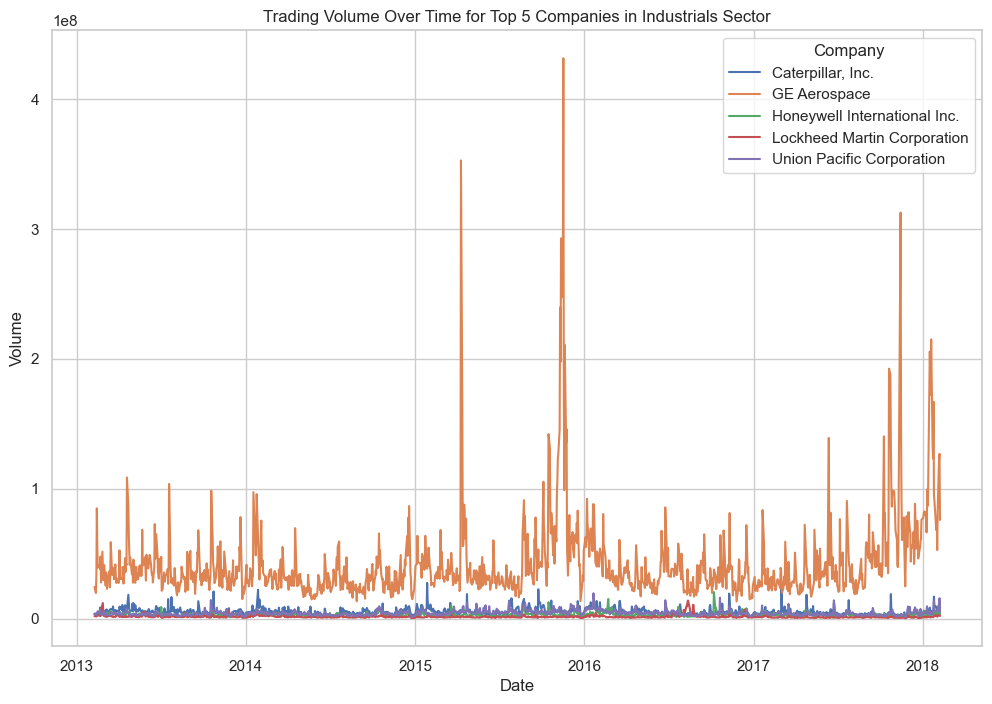

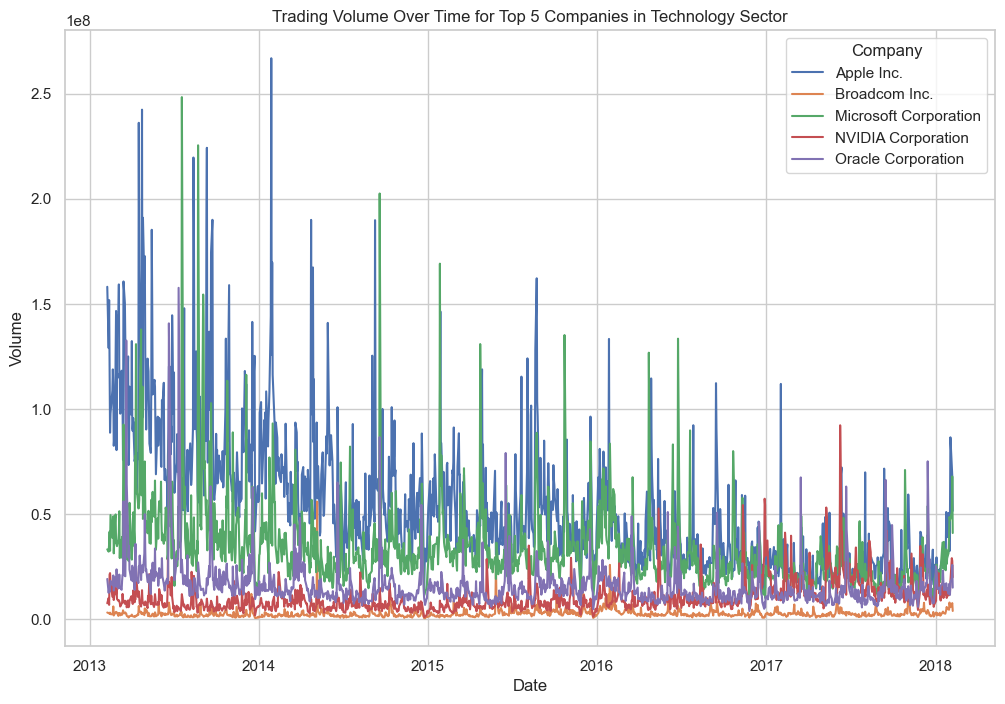

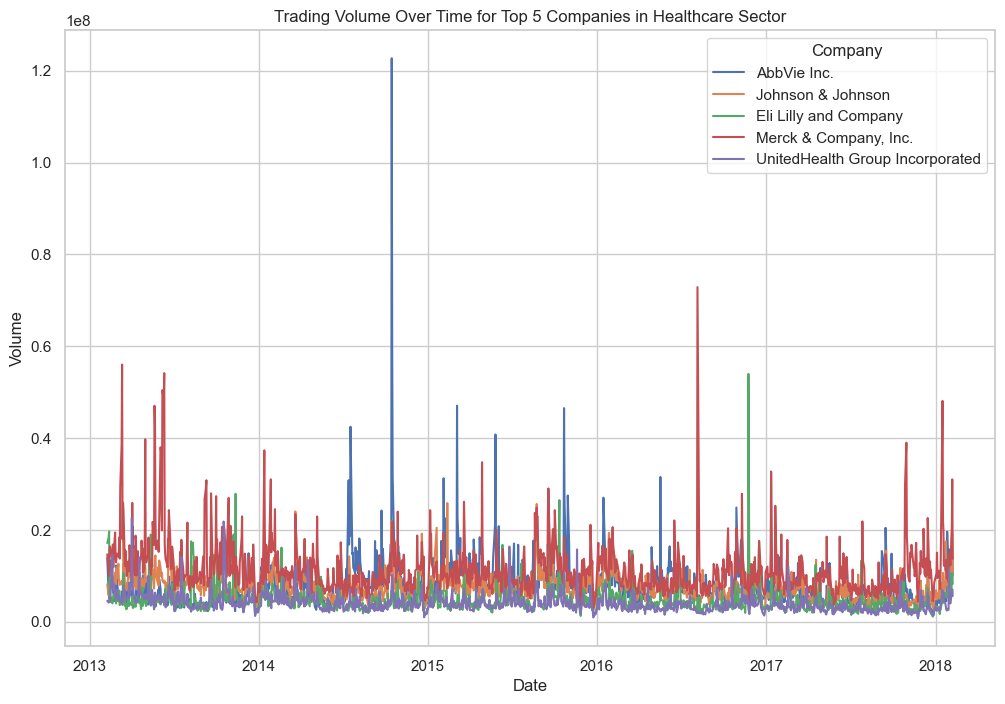

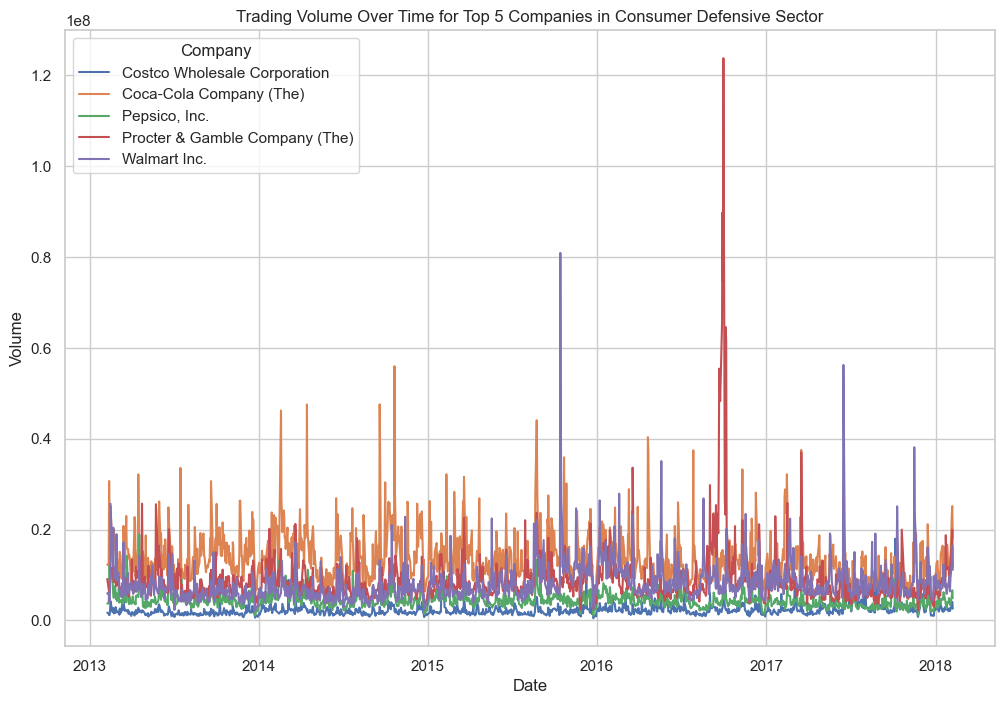

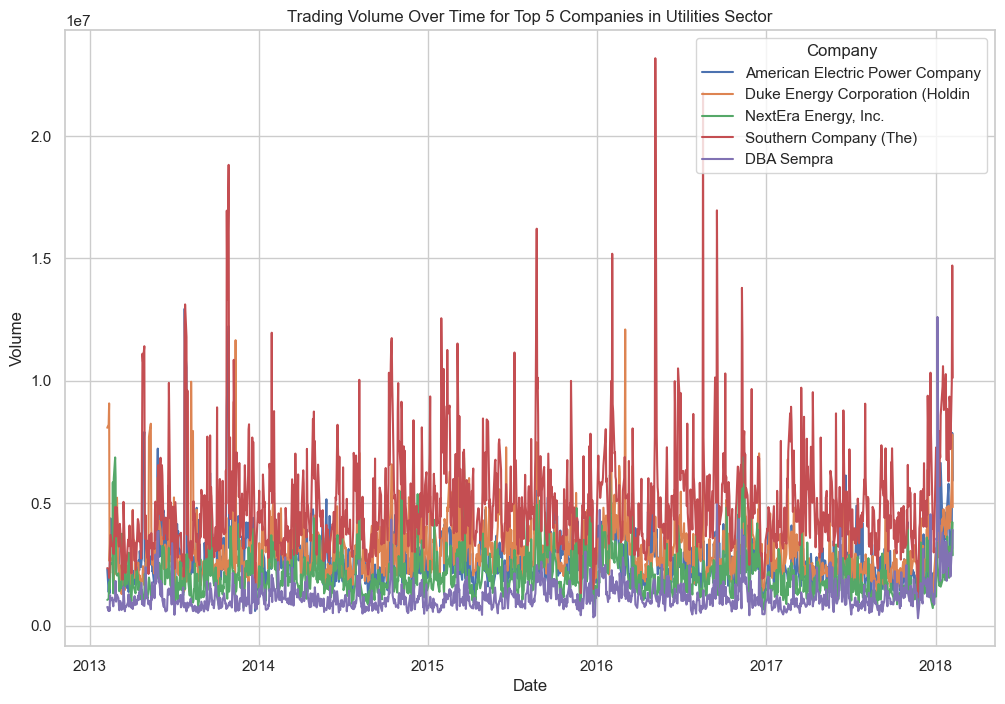

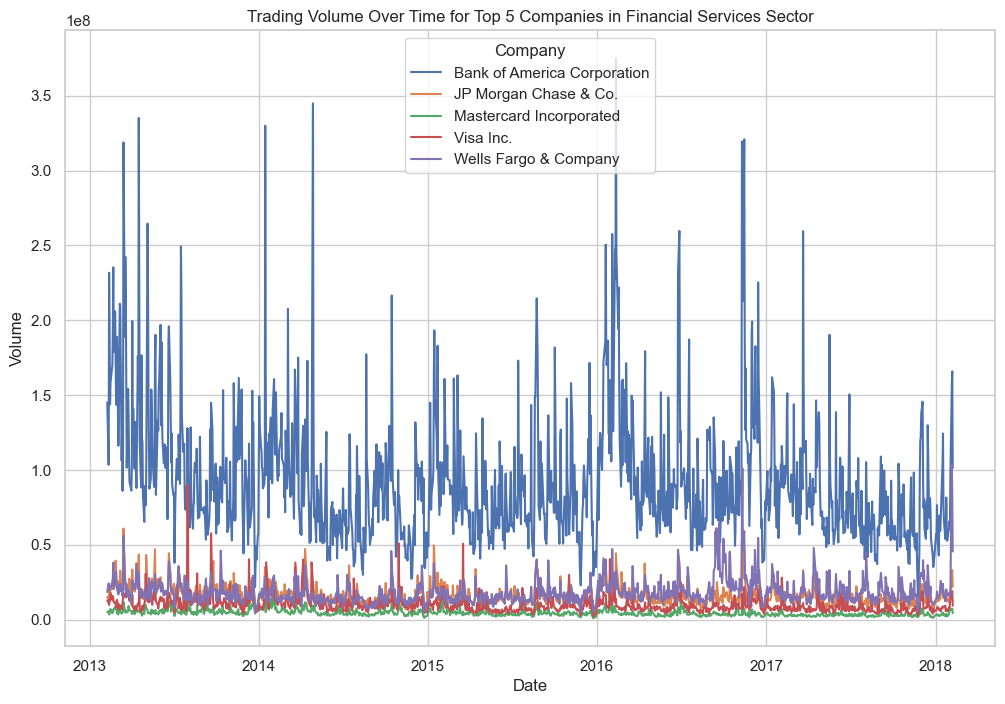

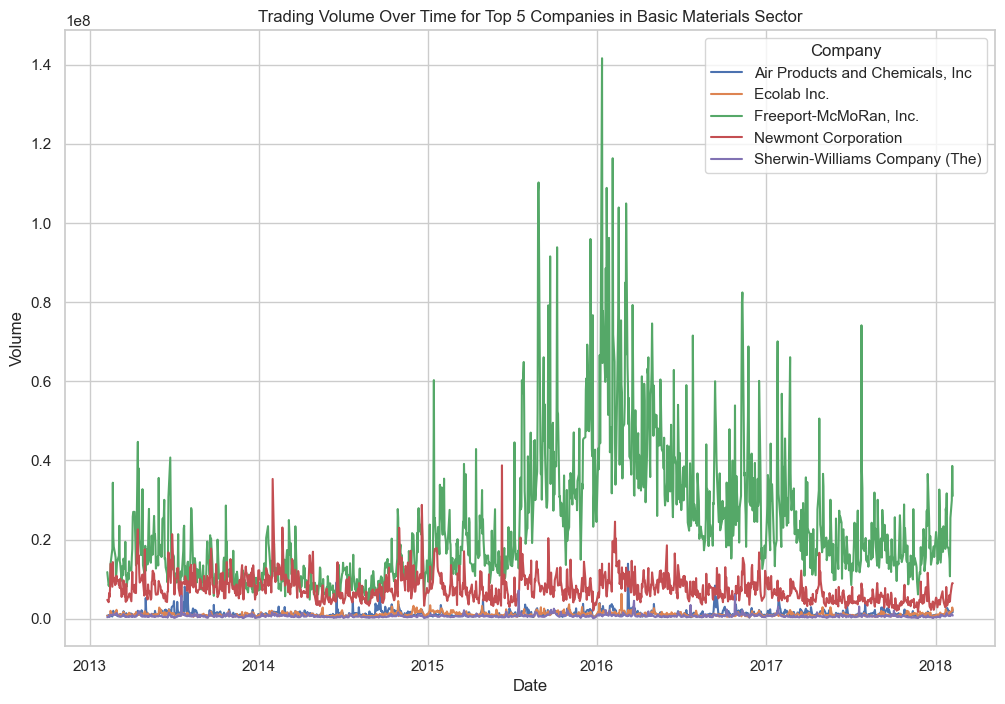

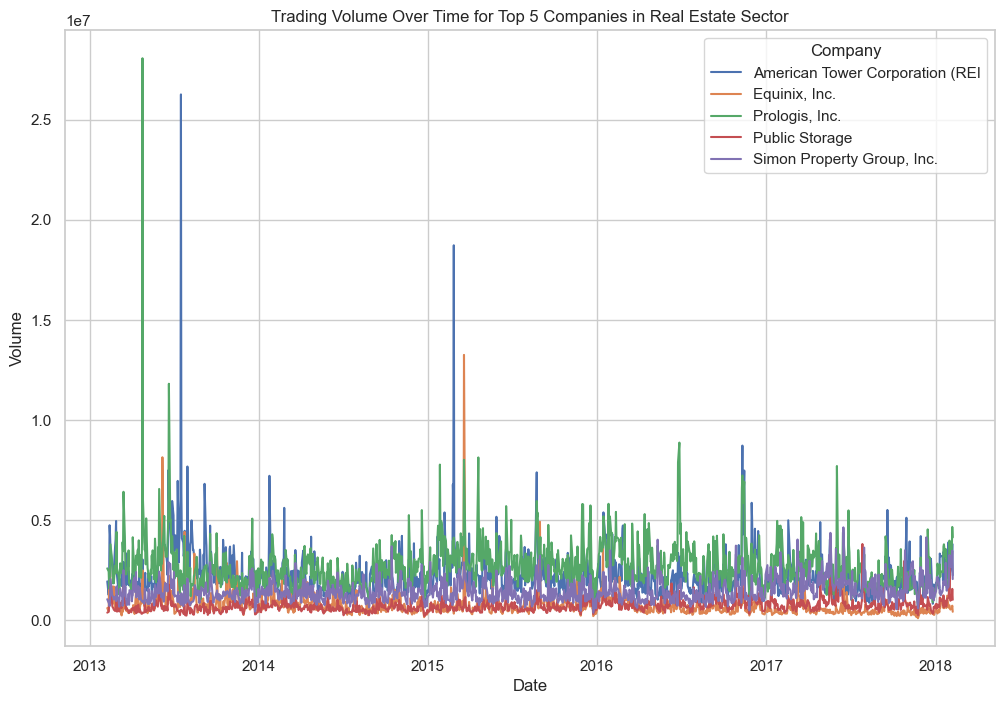

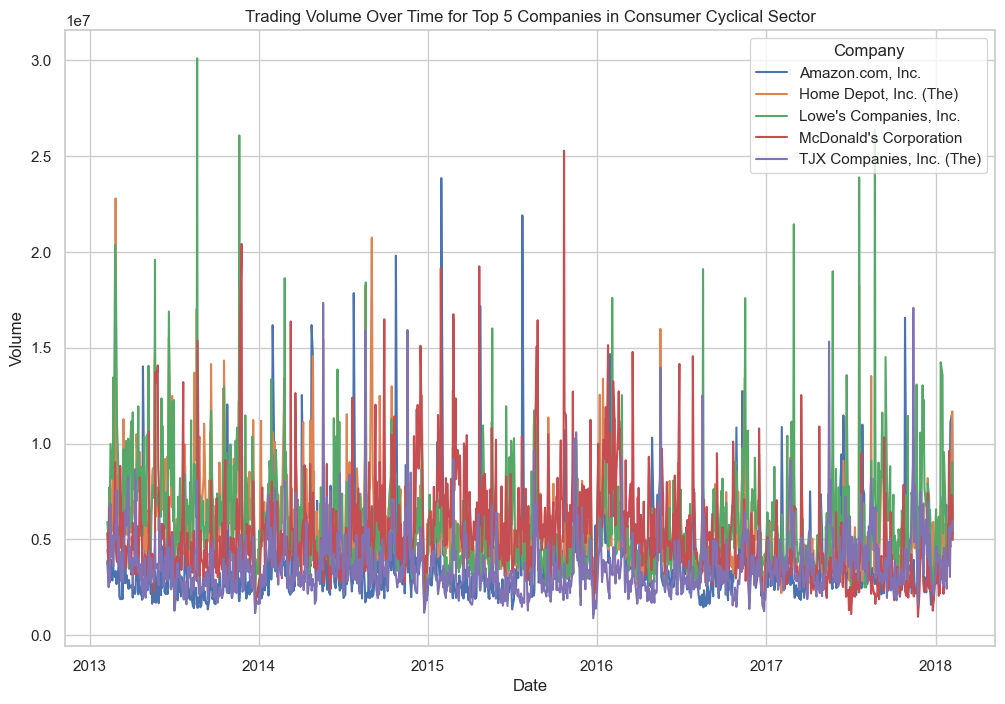

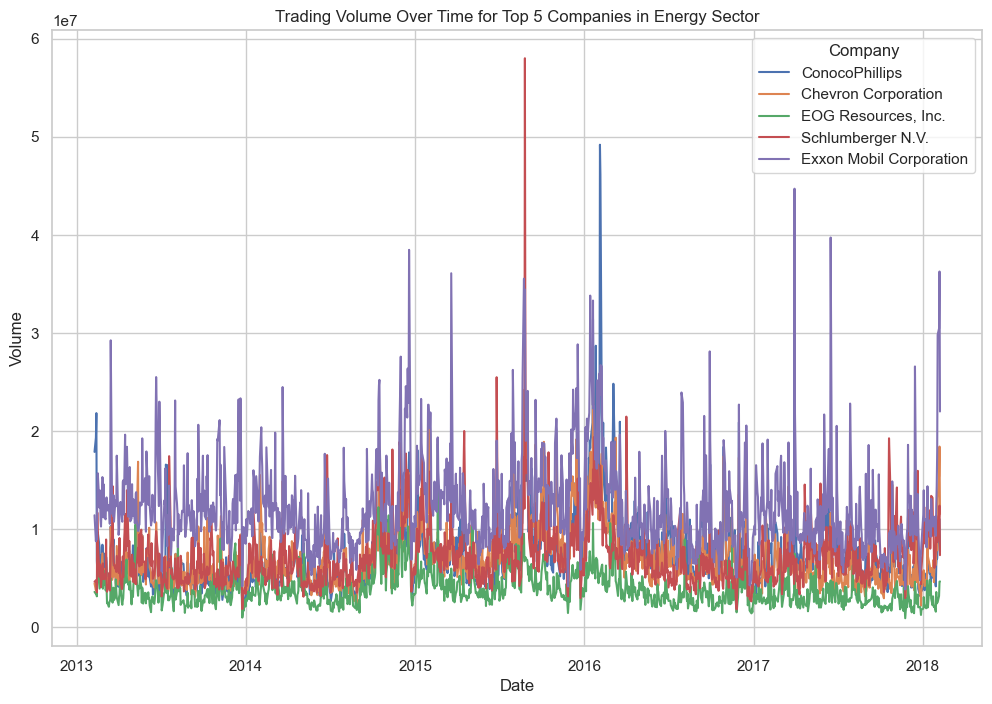

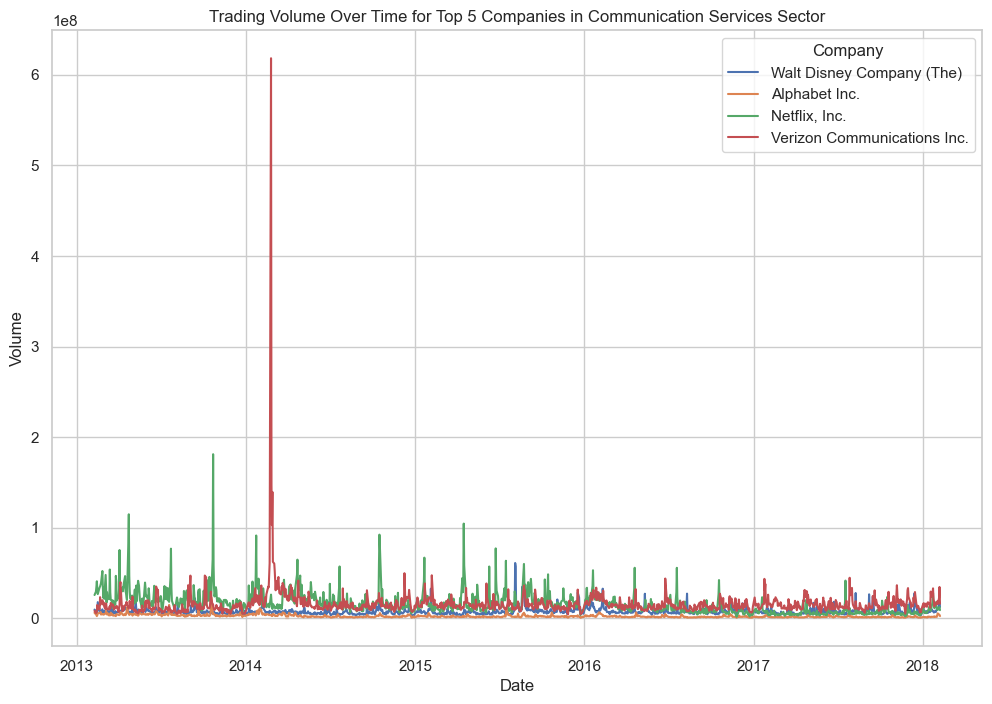

In [9]:
# Plotting trading volume over time for the top 5 companies in each sector
sns.set(style="whitegrid")

# Iterate over each sector and plot
for sector in top_data['Sector'].unique():
    plt.figure(figsize=(12, 8))
    sector_data = top_data[top_data['Sector'] == sector]
    
    sns.lineplot(x='Date', y='Volume', hue='Security', data=sector_data)
    
    plt.title(f'Trading Volume Over Time for Top 5 Companies in {sector} Sector')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend(title='Company')
    plt.show()

Data Analysis

Preparing Data for Return Analysis:

Objective: Calculate and format daily returns for stock symbols.

Action: Calculate daily returns for each company, remove missing values, and pivot the data to create a matrix where each column represents a company's daily returns.

In [10]:
df = final_df.copy()

In [11]:
def prepare_data(df):
    """
    Prepares the data by calculating daily returns, removing NaN values,
    and pivoting the data for plotting.
    
    Parameters:
    df (DataFrame): The original DataFrame with stock data.

    Returns:
    DataFrame: The formatted DataFrame with pivoted data ready for plotting.
    """
    # Calculate daily returns
    df['Daily_Return'] = df.groupby('Symbol')['Close'].pct_change()

    # Remove rows with NaN values in the 'Daily_Return' column
    df = df.dropna(subset=['Daily_Return'])

    # Initialize a data frame to contain the formatted data for plotting
    formatted_data = df[['Symbol', 'Date', 'Daily_Return']]

    # Convert the 'Date' column to datetime format if it's not already
    formatted_data['Date'] = pd.to_datetime(formatted_data['Date'])

    # Sort the data by Date to ensure chronological order
    formatted_data = formatted_data.sort_values(by='Date')

    # Pivot the ticker symbols from a column's entries to column headers
    formatted_data = formatted_data.pivot(index='Date', columns='Symbol', values='Daily_Return')
    
    return formatted_data

In [12]:
def plot_sector_returns(data, symbols):
    """
    Creates and displays a pair plot for the daily returns of the selected companies.

    Parameters:
    data (DataFrame): The pivoted DataFrame containing daily returns.
    symbols (list): A list of stock symbols to include in the plot.
    """
    # Filter the columns to include only the selected symbols
    formatted_data_it = data[symbols]

    # Create a pair plot for the selected companies
    sns.pairplot(formatted_data_it, kind='reg')

    # Display the plot
    plt.show()

In [13]:
# Example Usage
# Assuming 'df' is your original DataFrame with the stock data
formatted_data = prepare_data(df)

formatted_data.head()

C:\Users\yekaa\AppData\Local\Temp\ipykernel_11832\2834109831.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatted_data['Date'] = pd.to_datetime(formatted_data['Date'])


Symbol             A       AAL      AAPL      ABBV       ABT       ACN  \
Date                                                                     
2013-02-11 -0.010648 -0.019661  0.010422 -0.011034 -0.004359 -0.003274   
2013-02-12  0.000448 -0.013140 -0.025067 -0.011994  0.001168  0.004106   
2013-02-13  0.002913  0.027330 -0.001903 -0.004235  0.004665  0.002590   
2013-02-14 -0.003799 -0.045703 -0.000899  0.036859  0.006965 -0.005846   
2013-02-15 -0.052266  0.036455 -0.013780  0.027618  0.010951  0.014085   

Symbol          ADBE       ADI       ADM       ADP  ...       WMB       WMT  \
Date                                                ...                       
2013-02-11 -0.012270  0.008315  0.001985 -0.009602  ... -0.007222 -0.001119   
2013-02-12  0.006470  0.004123  0.017503  0.000331  ...  0.002798  0.000000   
2013-02-13 -0.002057 -0.000216  0.011360  0.001491  ... -0.005580 -0.000140   
2013-02-14 -0.005153  0.006053  0.007702  0.004797  ... -0.005051 -0.007984   
2013-02-15  0.000648 -0.007843  0.037261  0.007903  ... -0.009870 -0.021463   

Symbol            WY      WYNN       XEL       XOM       XYL       YUM  \
Date                                                                     
2013-02-11 -0.002317 -0.019127  0.003592 -0.003724  0.013658 -0.011485   
2013-02-12  0.005640 -0.011523  0.002147  0.002039  0.017844  0.003098   
2013-02-13  0.005609 -0.002201 -0.002857  0.002374  0.011091 -0.005251   
2013-02-14 -0.001312  0.006536 -0.001074 -0.001692  0.007431 -0.008073   
2013-02-15  0.006899 -0.001948  0.007888 -0.001808 -0.006674  0.001565   

Symbol           ZBH       ZTS  
Date                            
2013-02-11 -0.002637  0.006354  
2013-02-12 -0.002776  0.014432  
2013-02-13  0.007423 -0.005631  
2013-02-14  0.004474 -0.008346  
2013-02-15 -0.005764  0.021341  

[5 rows x 374 columns]

In [14]:
def get_symbols_by_sector(df, sector_name):
    """
    Returns a list of all unique stock symbols in a given sector.

    Parameters:
    df (DataFrame): The original DataFrame with stock data.
    sector_name (str): The name of the sector to filter by.

    Returns:
    list: A list of unique stock symbols in the specified sector.
    """
    # Filter the DataFrame by the sector name
    sector_data = df[df['Sector'] == sector_name]

    # Extract the unique symbols in that sector
    symbols = sector_data['Symbol'].unique().tolist()

    return symbols

In [15]:
# Extract the unique sectors
sectors = df['Sector'].unique().tolist()

print(sectors)

['Industrials', 'Technology', 'Healthcare', 'Consumer Defensive', 'Utilities', 'Financial Services', 'Basic Materials', 'Real Estate', 'Consumer Cyclical', 'Energy', 'Communication Services']


In [16]:
# Get the list of symbols for the Information Technology sector
it_symbols = get_symbols_by_sector(df, 'Technology')

# Print the symbols
print(it_symbols)

['AAPL', 'ACN', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'AMAT', 'AMD', 'ANSS', 'APH', 'AVGO', 'CDNS', 'CRM', 'CSCO', 'CTSH', 'FFIV', 'FIS', 'FTV', 'GLW', 'GRMN', 'HPE', 'HPQ', 'IBM', 'INTC', 'INTU', 'IT', 'JNPR', 'KLAC', 'LRCX', 'MCHP', 'MSFT', 'MSI', 'MU', 'NTAP', 'NVDA', 'ORCL', 'PAYX', 'QCOM', 'QRVO', 'ROP', 'SNPS', 'STX', 'SWKS', 'TEL', 'TXN', 'VRSN', 'WDC']


Pair Plot of Daily Returns:

Objective: Assess relationships between daily returns of selected companies.

Action: Generate a pair plot for selected companies to visualize correlations and patterns in daily returns. This helps in analyzing how the returns of different companies are related.
Sector-Specific Analysis:

Objective: Perform statistical analysis for the Information Technology sector.

Action: Calculate the mean, standard deviation, and correlation matrix of daily returns for top Information Technology companies. This provides a quantitative understanding of return characteristics and interrelationships within the sector.

Mean Daily Returns:
Symbol
AAPL    0.000786
ACN     0.000666
CRM     0.000939
CSCO    0.000601
MSFT    0.001039
dtype: float64

Standard Deviation of Daily Returns:
Symbol
AAPL    0.014593
ACN     0.011839
CRM     0.019128
CSCO    0.013258
MSFT    0.014210
dtype: float64

Correlation Matrix:
Symbol      AAPL       ACN       CRM      CSCO      MSFT
Symbol                                                  
AAPL    1.000000  0.297466  0.275019  0.340340  0.366598
ACN     0.297466  1.000000  0.364263  0.444588  0.438423
CRM     0.275019  0.364263  1.000000  0.362562  0.358778
CSCO    0.340340  0.444588  0.362562  1.000000  0.415870
MSFT    0.366598  0.438423  0.358778  0.415870  1.000000


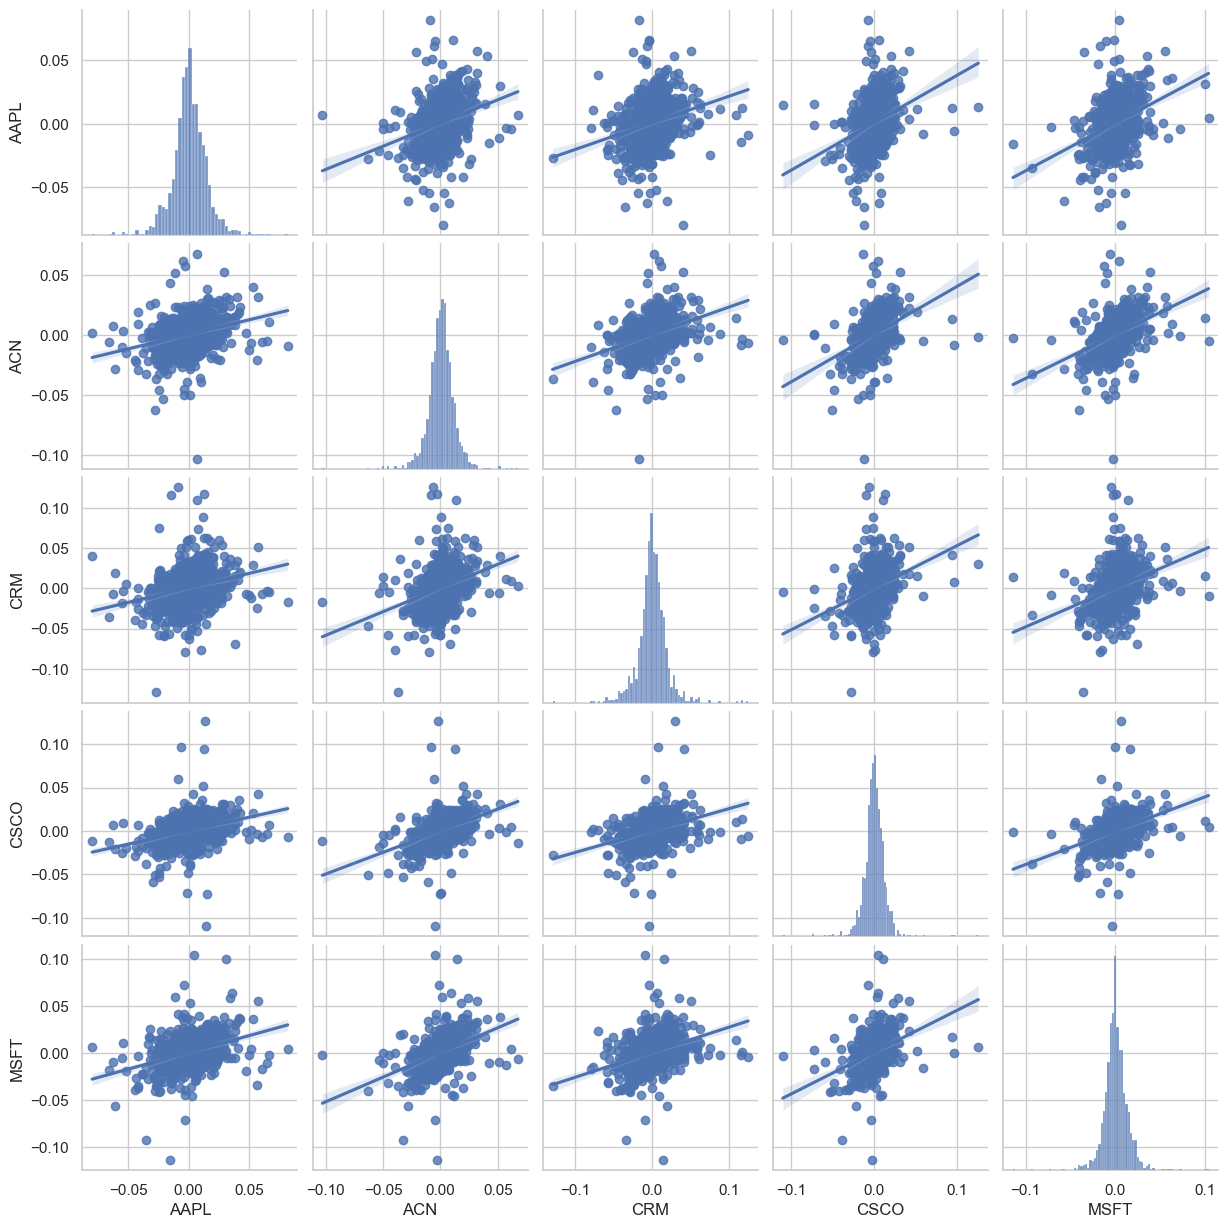

In [17]:
# Define the Information Technology sector companies
it_symbols = ['AAPL', 'ACN', 'CRM', 'CSCO', 'MSFT']

# Calculate the mean of daily returns for each Information Technology company
mean_returns = formatted_data[it_symbols].mean()

# Calculate the standard deviation of daily returns for each Information Technology company
std_returns = formatted_data[it_symbols].std()

# Calculate the correlation matrix for the daily returns of the Information Technology companies
correlation_matrix = formatted_data[it_symbols].corr()

# Display the results
print("Mean Daily Returns:")
print(mean_returns)
print("\nStandard Deviation of Daily Returns:")
print(std_returns)
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot the daily returns for the Information Technology sector
plot_sector_returns(formatted_data, it_symbols)